# export fgrid and fault id files from Petrel 

Make sure these two files are exported using the same setting, including setting cell origin to be (I=0, J=max, K). This is because, in Petrel, i goes from left to right (west to east), j goes from top to bottom (north to south). In CMG, i is the same, but j goes from bottom to top (south to north).

# extract information for each cell from a fgrid file

In [12]:
from extract_fgrid_file import extract_fgrid_file
df = extract_fgrid_file('data/JD_Sula_2025_flow.fgrid')
df

Total cells processed: 989001


,i,j,k,cell_id,x_ave,y_ave,z_ave
0,1,1,1,1,425203.1875,7129964.500,1673.812187
1,2,1,1,2,425696.7600,7129964.500,1673.635188
2,3,1,1,3,426190.3300,7129964.625,1673.305275
3,4,1,1,4,426683.9000,7129964.750,1672.819962
4,5,1,1,5,427177.4700,7129964.875,1672.187537
...,...,...,...,...,...,...,...
988996,103,117,79,988997,475383.5950,7072246.375,1214.582087
988997,104,117,79,988998,475877.2175,7072246.500,1213.734400
988998,105,117,79,988999,476370.8500,7072246.625,1213.076587
988999,106,117,79,989000,476864.4750,7072246.875,1212.613000


# decompress fault id file and attach it to the cell info dataframe

In [9]:
from CMG_format_decompress import CMG_format_decompress
fault_id = CMG_format_decompress('data/JD_Sula_2025_flow_fault_id2.GRDECL')
print(fault_id.shape)
df['fault_id'] = fault_id
df['fault_id'] = df['fault_id'].astype(int)
df

(989001,)


,i,j,k,cell_id,x_ave,y_ave,z_ave,fault_id
0,1,1,1,1,425220.4375,7072225.875,1320.006200,-999
1,2,1,1,2,425709.8450,7072226.000,1318.696775,-999
2,3,1,1,3,426199.2525,7072226.125,1316.518763,-999
3,4,1,1,4,426688.6575,7072226.375,1313.468012,-999
4,5,1,1,5,427178.0625,7072226.625,1309.529750,-999
...,...,...,...,...,...,...,...,...
988996,103,117,79,988997,475388.6025,7129985.500,1527.666100,-999
988997,104,117,79,988998,475877.0575,7129985.625,1521.742113,-999
988998,105,117,79,988999,476365.4925,7129985.750,1517.155925,-999
988999,106,117,79,989000,476853.9275,7129985.750,1513.888225,-999


# extract pressure from the npy file and attach it to the cell info dataframe

In [10]:
from extract_npy_properties import extract_npy_properties

df_fault = extract_npy_properties(
    fault_table = df,
    npy_property_file_path = 'data/rst_npy/case1_pres.npy',
    save_path = 'results/case1_fault_table2.csv',
    sim_year = [2030, 2040, 2050, 2060, 2550, 3050],
    n_i = 117,
    n_j = 107,
    k_layer_start = 41,
    k_layer_end = 79
    )

df_fault

,i,j,k,cell_id,x_ave,y_ave,z_ave,fault_id,2030,2040,2050,2060,2550,3050
0,1,1,1,1,425220.4375,7072225.875,1320.006200,-999,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2,425709.8450,7072226.000,1318.696775,-999,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,3,426199.2525,7072226.125,1316.518763,-999,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,4,426688.6575,7072226.375,1313.468012,-999,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,5,427178.0625,7072226.625,1309.529750,-999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988996,103,117,79,988997,475388.6025,7129985.500,1527.666100,-999,NaN,NaN,NaN,NaN,NaN,NaN
988997,104,117,79,988998,475877.0575,7129985.625,1521.742113,-999,NaN,NaN,NaN,NaN,NaN,NaN
988998,105,117,79,988999,476365.4925,7129985.750,1517.155925,-999,NaN,NaN,NaN,NaN,NaN,NaN
988999,106,117,79,989000,476853.9275,7129985.750,1513.888225,-999,NaN,NaN,NaN,NaN,NaN,NaN


# check

In [11]:
import pandas as pd
import numpy as np
case1_pres = np.load('data/rst_npy/case1_pres.npy')
fault_table = pd.read_csv('results/case1_fault_table2.csv')
i = 20
j = 30
k = 50
k_layer_start = 41
print(case1_pres[i-1,j-1,k - k_layer_start,1])
print(fault_table.loc[(fault_table['i'] == i) & (fault_table['j'] == j) & (fault_table['k'] == k), '2040'])

16495.303253099482
616553    16495.303253
Name: 2040, dtype: float64


In [24]:
import pandas as pd
df_check = pd.read_csv('data/case1_PRES_layer41_1.rwo', header=None, skiprows=4, sep=r'\s+')
# df_check = pd.read_csv('data/case1_PRES_layer41_1.rwo', sep=r'\s+')
df_check.columns = ['x', 'y', 'PRES']
df_check

,x,y,PRES
0,449216.16,7072236.99,6760.74
1,448221.85,7072735.57,6918.79
2,448721.19,7072736.51,6869.68
3,449220.28,7072737.31,6845.14
4,449719.15,7072737.98,6816.35
...,...,...,...
6819,456333.72,7129482.13,20815.80
6820,456836.14,7129485.54,20766.60
6821,455320.31,7129971.90,20887.20
6822,455822.90,7129974.32,20891.00


In [25]:
import pandas as pd
df_check = pd.read_csv('data/case1_PRES_layer41_2.rwo', header=None, skiprows=4, sep=r'\s+')
# df_check = pd.read_csv('data/case1_PRES_layer41_1.rwo', sep=r'\s+')
df_check.columns = ['x', 'y', 'PRES']
df_check

,x,y,PRES
0,449216.16,7072236.99,8270.47
1,448221.85,7072735.57,8436.34
2,448721.19,7072736.51,8385.19
3,449220.28,7072737.31,8357.75
4,449719.15,7072737.98,8327.38
...,...,...,...
6819,456333.72,7129482.13,22548.80
6820,456836.14,7129485.54,22499.00
6821,455320.31,7129971.90,22620.90
6822,455822.90,7129974.32,22624.30


In [36]:
107*117

12519

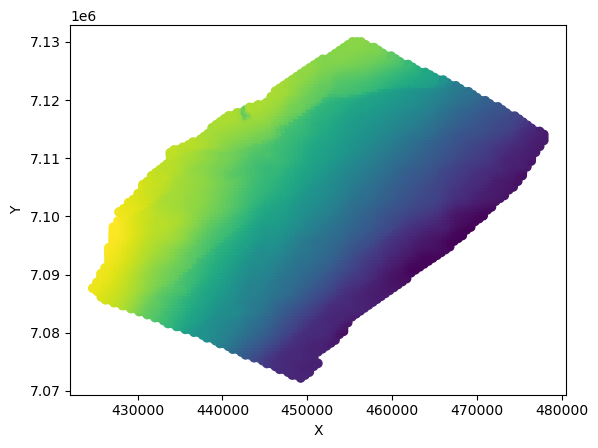

In [30]:
import matplotlib.pyplot as plt  

plt.scatter(df_check['x'], df_check['y'], c=df_check['PRES'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()